**Eighth chapter of Hands-on Machine learning with Scikit-Learn, Keras, and Tensorflow.**

Find the book from → [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition)](https://homl.info/er3)

# Setup

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [26]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [27]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# PCA

In [5]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

## Principal Components

In [6]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
Vt

array([[ 0.67857588,  0.70073508,  0.22023881],
       [-0.72817329,  0.6811147 ,  0.07646185],
       [-0.09642839, -0.21225719,  0.97244458]])

In [7]:
c1 = Vt[0]
c2 = Vt[1]

Note: in principle, the SVD factorization algorithm returns three matrices, U, Σ and V, such that X = $UΣV_⊺$, where U is an m × m matrix, Σ is an m × n matrix, and V is an n × n matrix. But the svd() function returns U, s and V⊺ instead. s is the vector containing all the values on the main diagonal of the top n rows of Σ. Since Σ is full of zeros elsewhere, your can easily reconstruct it from s, like this:

In [8]:
m, n = X.shape
Σ = np.zeros_like(X_centered)
Σ[:n, :n] = np.diag(s)

np.allclose(X_centered, U @ Σ @ Vt)

True

## Projecting Down to d Dimensions

In [9]:
W2 = Vt[:2].T
X2D = X_centered @ W2

In [10]:
X2D.shape

(60, 2)

## Using Scikit-Learn

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D.shape

(60, 2)

In [12]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

## Explained Variance Ratio

In [13]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [14]:
1 - pca.explained_variance_ratio_.sum() 

0.09028309326742034

## Choosing the Right Number of Dimensions

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [16]:
d

154

In [17]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

(60000, 154)

In [18]:
pca.n_components_

154

In [19]:
pca.explained_variance_ratio_.sum()

0.9501960192613033

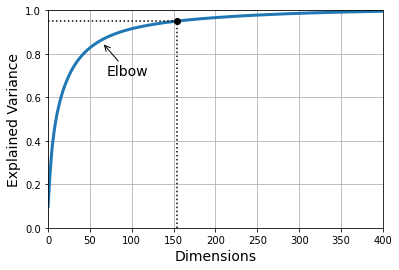

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)

plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))

param_distrib = {
    'pca__n_components': np.arange(10, 80),
    'randomforestclassifier__n_estimators': np.arange(50, 500)
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       

In [22]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
params = {
    "pca__n_components": np.arange(10, 80)
}

grid_search = GridSearchCV(clf, params, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [24]:
print(grid_search.best_params_)

{'pca__n_components': 60}


## PCA for Compression

In [25]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [26]:
X_recovered = pca.inverse_transform(X_reduced)

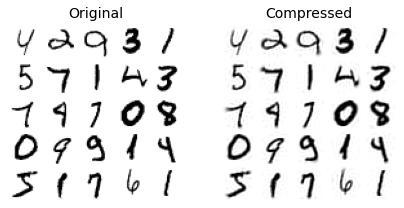

In [27]:
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

## Randomized PCA

In [28]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## Incremental PCA

In [29]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

### Using NumPy's memmap class – a memory-map to an array stored in a binary file on disk.

**Create a memmap**

In [30]:
filename = 'my_mnist.mmap'
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train
X_mmap.flush()

**Load the data and use it for training **

In [31]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

# Random Projection

In [32]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, e = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=e)
d

7300

In [33]:
# Johonson lindenstrauss equation
d = int(4 * np.log(m) / (e ** 2 / 2 - e ** 3 / 3))
d

7300

**Now we can generate a random matrix P of shape [d, n], where each item is sampled randomly from a Gaussian distribution with mean 0 and variance $\frac{1}{d}$**

In [35]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)
X = np.random.randn(m, n)
X_reduced = X @ P.T

In [36]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=e, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

In [37]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered =X_reduced @ components_pinv.T

## SparseRndProj vs. GaussianRndProj

In [38]:
from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print("SparseRandomProjection fit")
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection transform")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform")
%timeit sparse_rnd_proj.transform(X)

GaussianRandomProjection fit
6.66 s ± 38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
3.3 s ± 472 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection transform
45.2 s ± 789 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
5.58 s ± 51.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# LLE

In [54]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

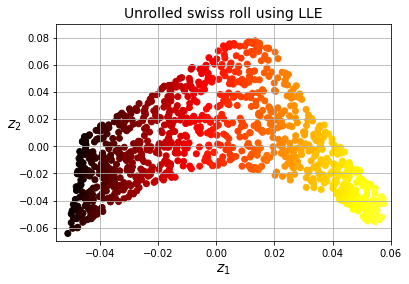

In [41]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()

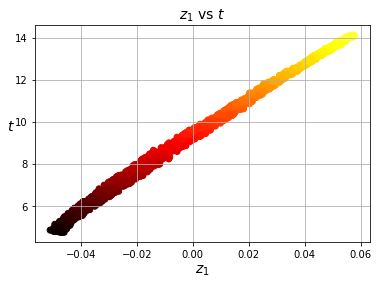

In [42]:
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

# T-SNE, ISOMAP, MDS

In [58]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [44]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

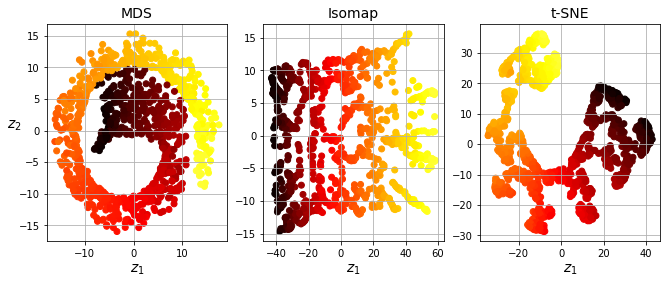

In [46]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

**Depending on the downstream task, preserving the large-scale structure may be good or bad**

# Summaries

----------------
The main motivations for dimensionality reduction are:

- To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)
- To visualize the data and gain insights on the most important features
- To save space (compression)

The main drawbacks are:

- Some information is lost, possibly degrading the performance of subsequent training algorithms.
- It can be computationally intensive.
- It adds some complexity to your Machine Learning pipelines.
- Transformed features are often hard to interpret.

--------------

------------
> The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space. In Machine Learning, one common manifestation is the fact that randomly sampled high-dimensional vectors are generally far from one another, increasing the risk of overfitting and making it very difficult to identify patterns without having plenty of training data.
--------------

---------------
> Once a dataset's dimensionality has been reduced using one of the algorithms we discussed, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as t-SNE) do not.
-----------------

-------------
> PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions—as in the Swiss roll dataset—then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.
---------------

-----------
> Regular PCA is the default, but it works only if the dataset fits in memory. Incremental PCA is useful for large datasets that don't fit in memory, but it is slower than regular PCA, so if the dataset fits in memory you should prefer regular PCA. Incremental PCA is also useful for online tasks, when you need to apply PCA on the fly, every time a new instance arrives. Randomized PCA is useful when you want to considerably reduce dimensionality and the dataset fits in memory; in this case, it is much faster than regular PCA. Finally, Random Projection is great for very high-dimensional datasets.
-----------

> suppose the dataset is composed of points that are almost perfectly aligned. In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance. Now imagine that the dataset is composed of perfectly random points, scattered all around the 1,000 dimensions. In this case roughly 950 dimensions are required to preserve 95% of the variance. So the answer is, it depends on the dataset, and it could be any number between 1 and 950. Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of the dataset's intrinsic dimensionality.

-----------
> Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.
--------------

----------
> It can absolutely make sense to chain two different dimensionality reduction algorithms. A common example is using PCA or Random Projection to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. This two-step approach will likely yield roughly the same performance as using LLE only, but in a fraction of the time.
-------------

## 9. Dimension reduction effects on MNIST Datasets 

In [44]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

### RandomForestClassifier

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [3]:
%time rnd_clf.fit(X_train, y_train)

CPU times: user 35.6 s, sys: 76.4 ms, total: 35.7 s
Wall time: 37 s


RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [46]:
from sklearn.decomposition import PCA

pca_prep = PCA(n_components=0.95)
X_pca_reduced = pca_prep.fit_transform(X_train)

In [11]:
X_pca_reduced.shape

(60000, 154)

In [13]:
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf_with_pca.fit(X_pca_reduced, y_train)

CPU times: user 1min 33s, sys: 160 ms, total: 1min 34s
Wall time: 1min 34s


RandomForestClassifier(random_state=42)

In [17]:
X_test_reduced = pca_prep.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

### SGDClassifier

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 2min 40s, sys: 330 ms, total: 2min 40s
Wall time: 2min 45s


SGDClassifier(random_state=42)

In [20]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [22]:
sgd_clf_with_pca = SGDClassifier(random_state=42)

%time sgd_clf_with_pca.fit(X_reduced_pca, y_train)

CPU times: user 26.2 s, sys: 29 ms, total: 26.2 s
Wall time: 26.2 s


SGDClassifier(random_state=42)

In [23]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8959

Using PCA in **SGDClassifier** boost our speed, whereas in **RandomForestClassifier** it degrade model speed with a decrease in accuracy

## 10. t-SNE on MNIST dataset

In [24]:
X_samples, y_samples = mnist.data[:5_000], mnist.target[:5_000]

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)

%time X_reduced = tsne.fit_transform(X_samples)

CPU times: user 59.6 s, sys: 514 ms, total: 1min
Wall time: 34.7 s


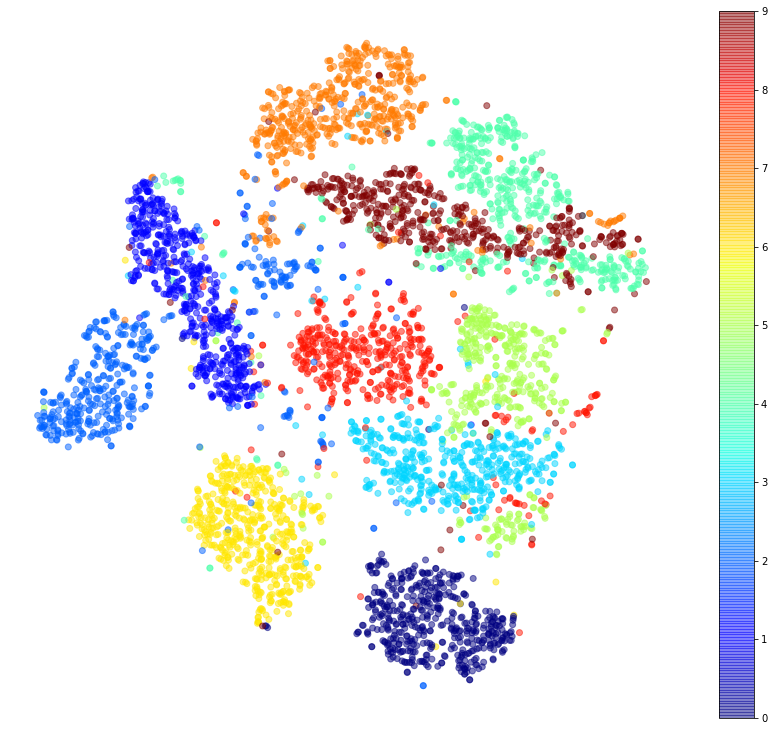

In [30]:
import numpy as np

plt.figure(figsize=(15, 13))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_samples.astype(np.int8), cmap='jet', alpha=0.5)

plt.axis('off')
plt.colorbar()
plt.show()

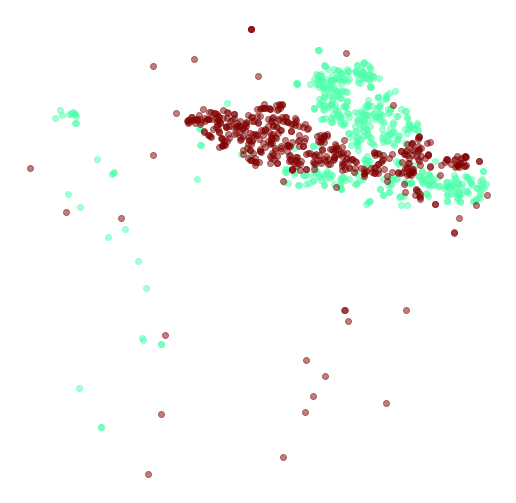

In [31]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
  plt.scatter(X_reduced[y_samples == digit, 0], X_reduced[y_samples == digit, 1],
              c=[cmap(float(digit)/ 9)], alpha=0.5)

plt.axis('off')
plt.show()

In [34]:
idx = (y_samples=='4') | (y_samples=='9')
X_subset = X_samples[idx]
y_subset = y_samples[idx]

tsne_subset = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

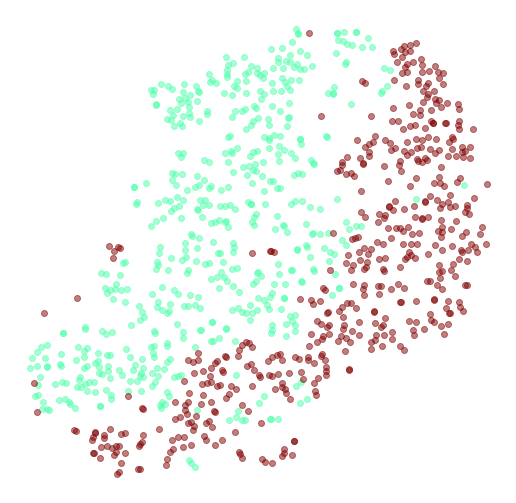

In [35]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
  plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1],
              c=[cmap(float(digit)/ 9)], alpha=0.5)

plt.axis('off')
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
  X_normalized = MinMaxScaler().fit_transform(X)
  neighbors = np.array([[10, 10]])

  plt.figure(figsize=figsize)
  cmap = plt.cm.jet
  digits = np.unique(y)
  for digit in digits:
    plt.scatter(X_normalized[y==digit, 0], X_normalized[y==digit, 1], c=[cmap(float(digit)/9)], alpha=0.5)
  
  plt.axis('off')
  ax = plt.gca()
  for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > min_distance:
      neighbors = np.r_[neighbors, [image_coord]]
      if images is None:
        plt.text(image_coord[0], image_coord[1], str(int(y[index])), color=cmap(float(y[index]) / 9), fontdict={'weight': 'bold', 'size':16})
      else:
        image = images[index].reshape(28, 28)
        imagebox = AnnotationBbox(OffsetImage(image, cmap='binary'), image_coord)
        ax.add_artist(imagebox)

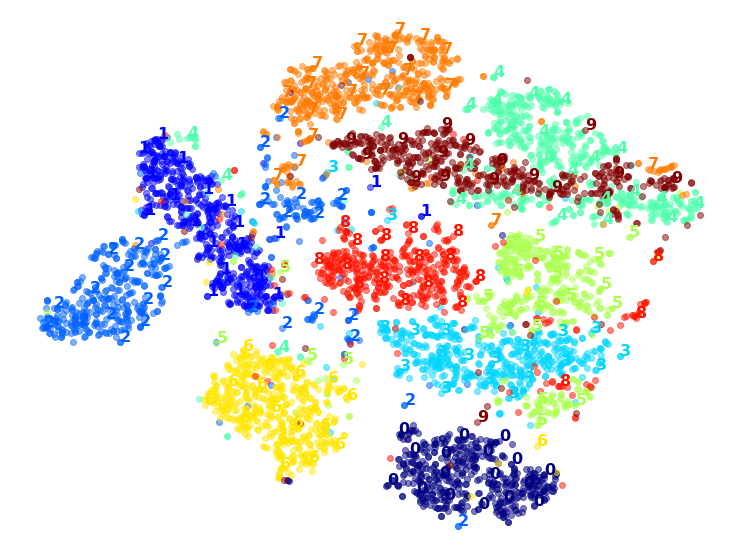

In [40]:
plot_digits(X_reduced, y_samples)

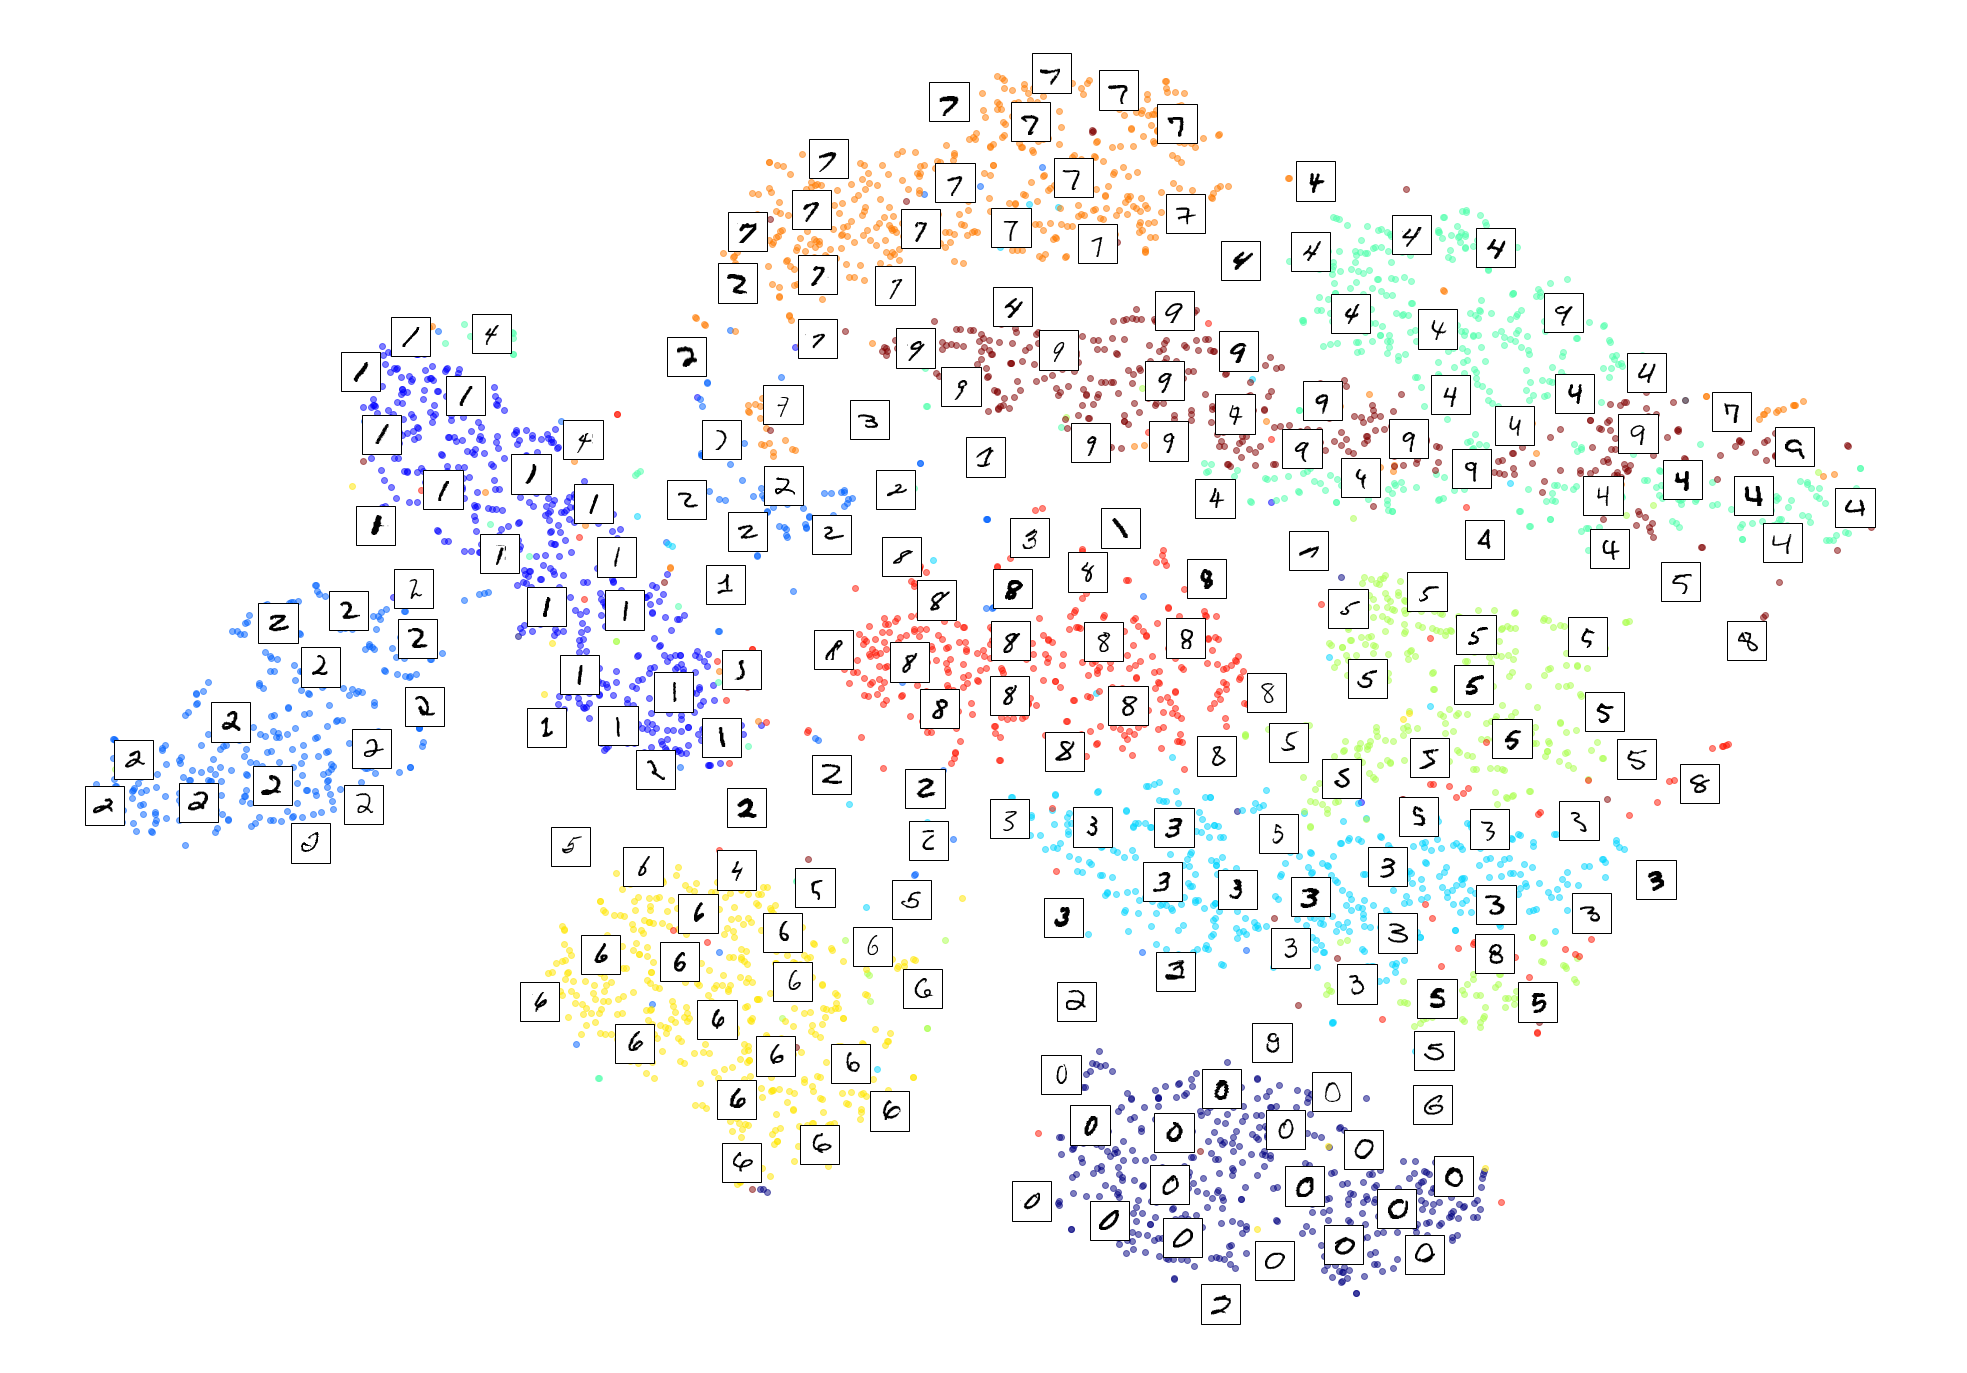

In [41]:
plot_digits(X_reduced, y_samples, images=X_samples, figsize=(35, 25))

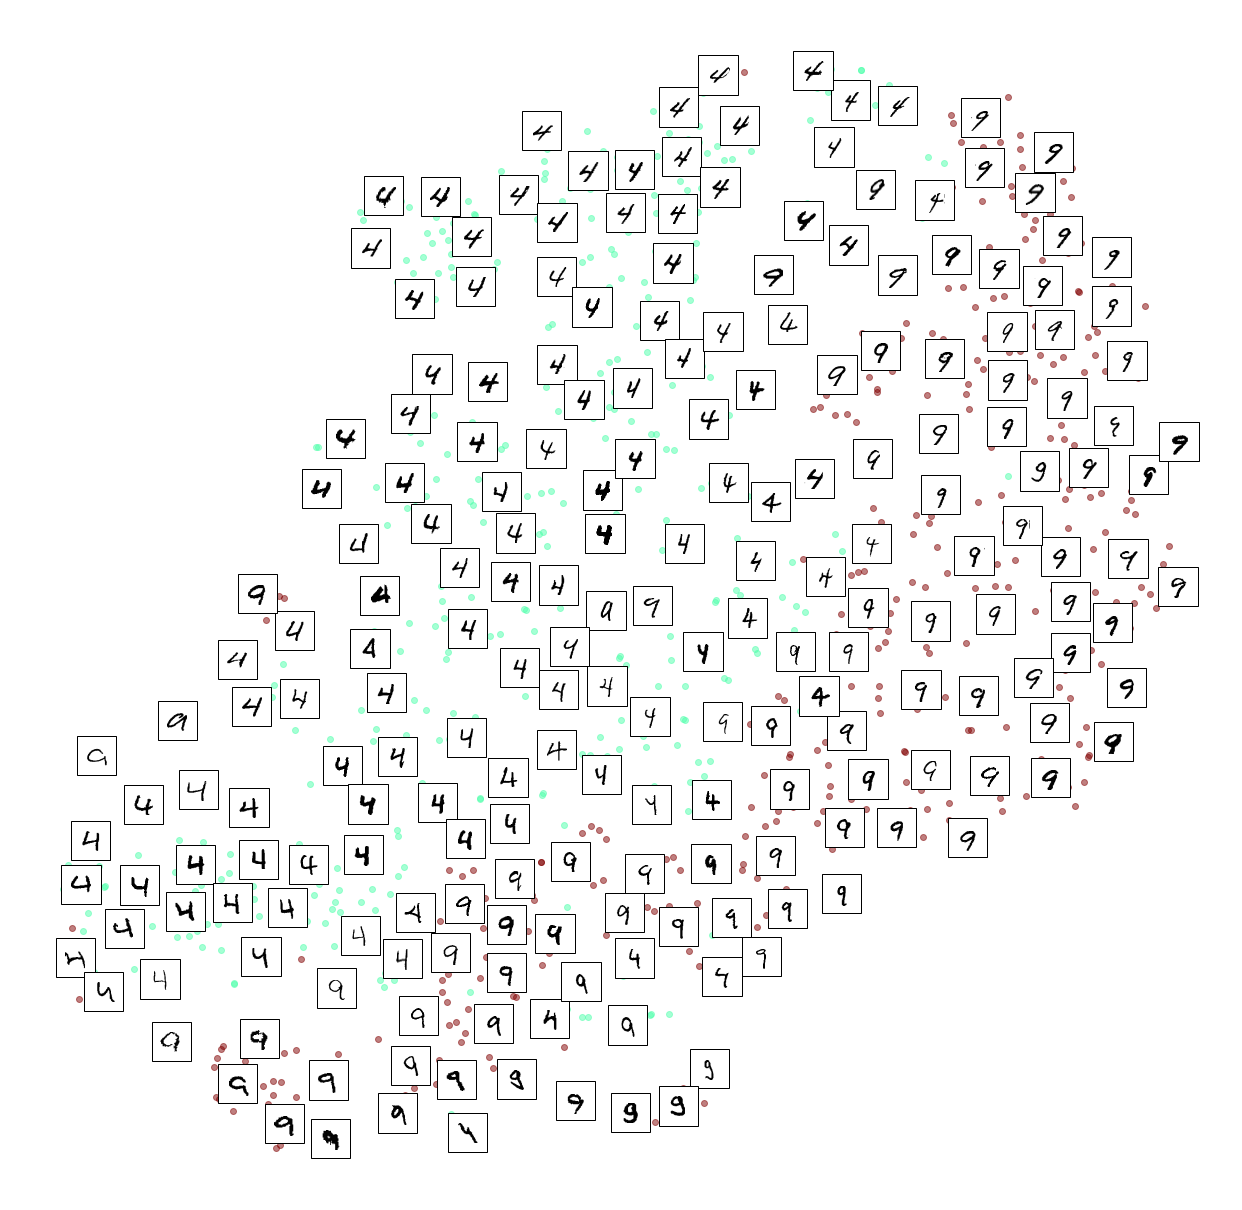

In [42]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

### PCA

CPU times: user 303 ms, sys: 200 ms, total: 502 ms
Wall time: 274 ms


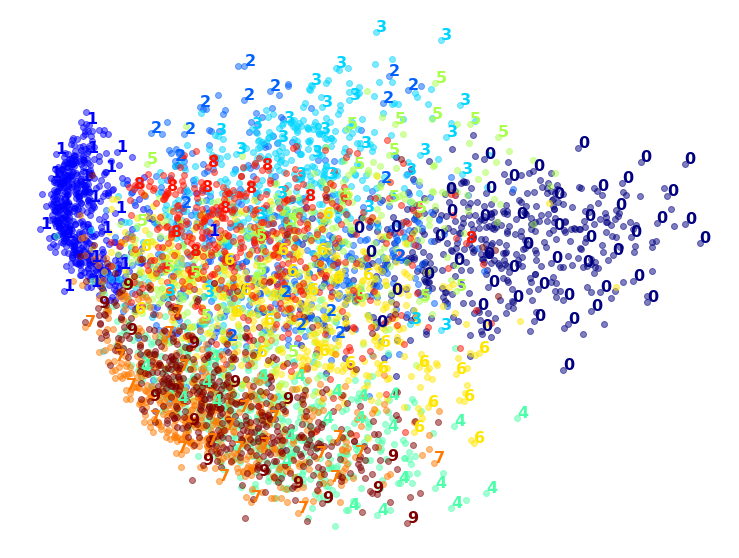

In [49]:
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_samples)
plot_digits(X_pca_reduced, y_samples)
plt.show()

### LLE

CPU times: user 3.55 s, sys: 1.37 s, total: 4.92 s
Wall time: 3.33 s


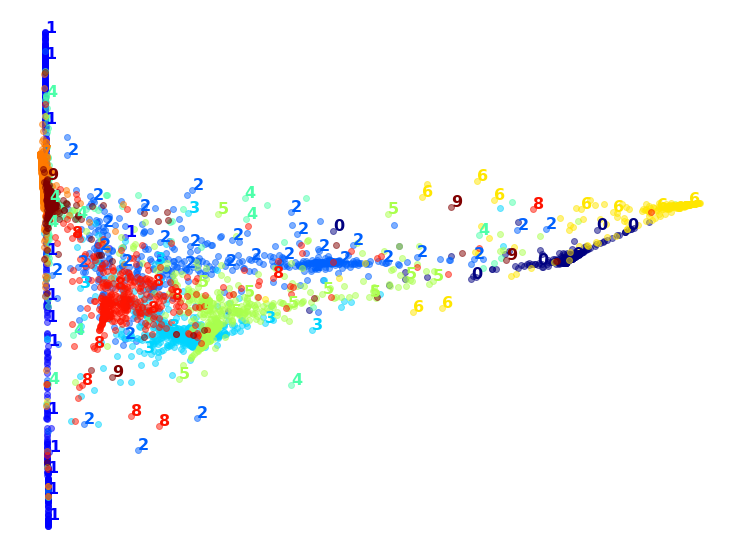

In [52]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_samples)
plot_digits(X_lle_reduced, y_samples)
plt.show()

### PCA & LLE

CPU times: user 3.82 s, sys: 1.45 s, total: 5.26 s
Wall time: 3.86 s


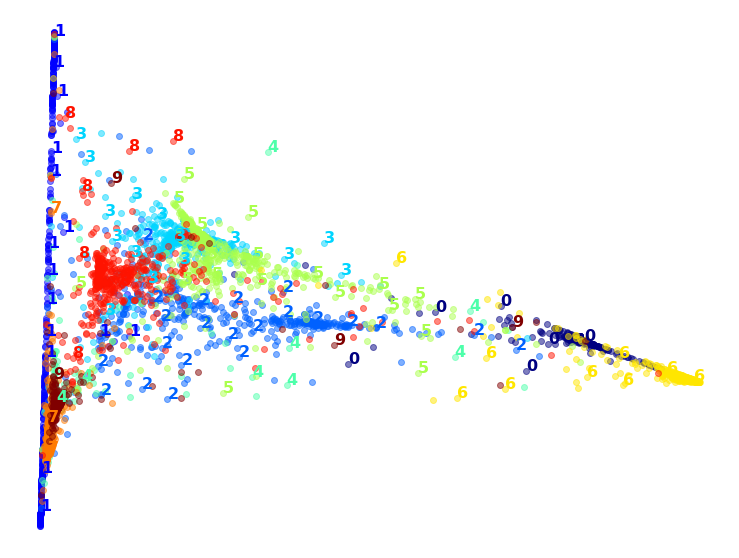

In [53]:
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_samples)
plot_digits(X_pca_lle_reduced, y_samples)
plt.show()

### MDE

CPU times: user 7min 5s, sys: 2min 2s, total: 9min 8s
Wall time: 6min 21s


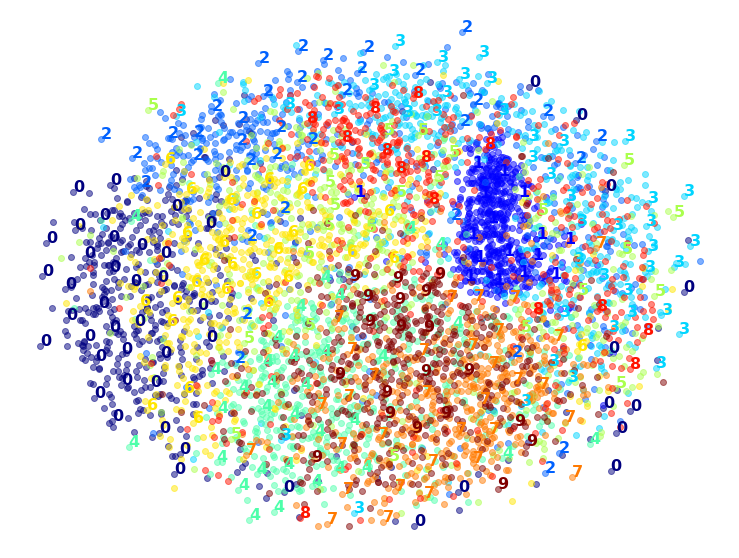

In [59]:
mds = MDS(n_components=2, random_state=42)
%time X_mds_reduced = mds.fit_transform(X_samples)
plot_digits(X_mds_reduced, y_samples)
plt.show()

### PCA & MDS

CPU times: user 7min 21s, sys: 2min 9s, total: 9min 30s
Wall time: 6min 29s


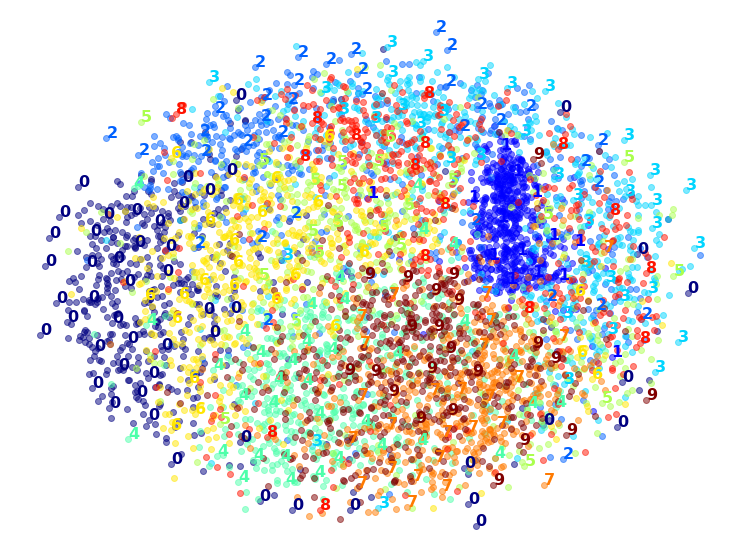

In [60]:
pca_mds = make_pipeline(PCA(n_components=0.95, random_state=42),
                        MDS(n_components=2, random_state=42))

%time X_pca_mds_reduced = pca_mds.fit_transform(X_samples)
plot_digits(X_pca_mds_reduced, y_samples)
plt.show()

### LinearDiscriminantAnalysis

CPU times: user 1.64 s, sys: 133 ms, total: 1.78 s
Wall time: 1.08 s


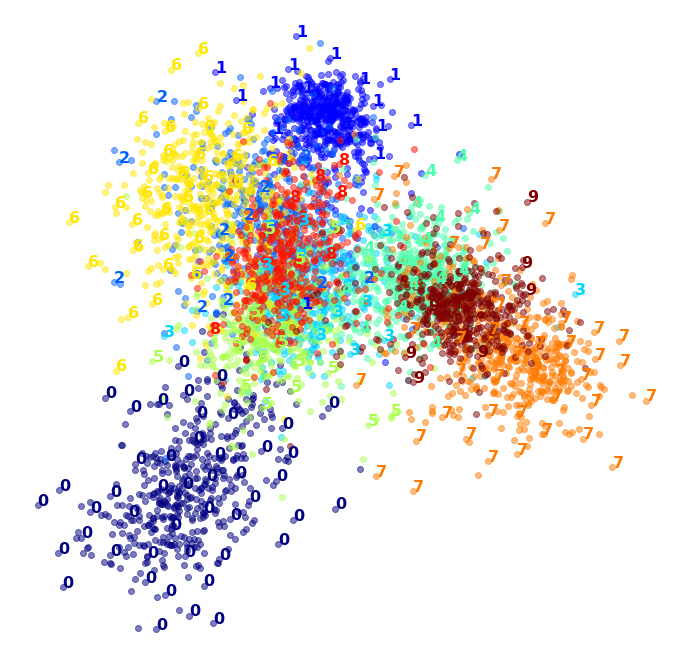

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_samples, y_samples)
plot_digits(X_lda_reduced, y_samples, figsize=(12, 12))
plt.show()